In [2]:
import torch
import numpy as np


from torchvision import datasets, transforms

datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz', 'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz', 'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz', '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz', 'ec29112dd5afa0611ce80d1b7f02629c')
        ]


In [3]:
transform = transforms.ToTensor()
trainMnist = datasets.FashionMNIST("./fashionMnist", download=True, train=True, transform = transform)
testMnist = datasets.FashionMNIST("./fashionMnist", download=True, train=False, transform=transform)

In [4]:
trainData = torch.utils.data.DataLoader(trainMnist)
testData = torch.utils.data.DataLoader(testMnist)

for images, labels in trainData:
    print(images.view(-1, 28*28))
    break

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0

60000


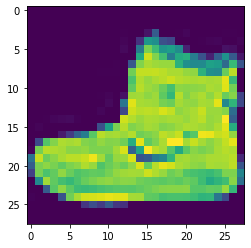

In [10]:
import matplotlib.pyplot as plt

for images, labels in trainData:
    plt.imshow(images[0][0])
    break

In [82]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(28*28, 100)
        self.layer2 = nn.Linear(100, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.layer1(x)
        x = F.relu(x)
        output = self.layer2(x)

        return output
    


In [83]:
model = Net()

tensor([[ 0.2075,  0.0009,  0.0373,  0.1878,  0.0201, -0.1245,  0.1959, -0.0188,
         -0.0155,  0.0400]], grad_fn=<AddmmBackward>)


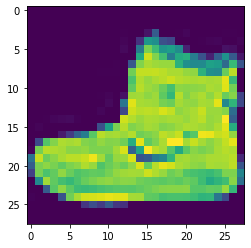

In [84]:
for images, labels in trainData:
    result = model(images)
    print(result)
    plt.imshow(images[0][0])
    break

In [89]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum')

In [90]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print(device)
#model.to(device)

for epoch in range(10):
    loss_sum = 0
    for images, labels in trainData:
        #images, labels = images.to(device), labels.to(device)
        
        result = model(images)

        loss = loss_fn(result, labels)
        loss_sum += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(loss_sum / len(trainData))

0.43565414177490447
0.37149395537920143
0.34396616106136707
0.3257564004874414
0.31192997921037274
0.298141181636688
0.28810620122023284


KeyboardInterrupt: 

In [87]:
len(testData)

10000

In [88]:
for images, labels in testData:
    result = model(images)
    print(result)
    break

tensor([[-3.7406, -5.2056, -4.5834, -3.1234, -2.3052,  5.4756, -2.9964,  5.9556,
          3.3422,  8.0354]], grad_fn=<AddmmBackward>)
